**O que eu quero saber?**

1- Qual a quantidade de clientes que possuem financiamento de cada produto?



2- Qual o menor valor financiado?


3- Qual o maior valor financiado?


4- Qual o cliente que possui a menor idade?



5- Qual o cliente que possui a maior idade?

In [ ]:
#Impotação das Bibliotecas

#Pandas: Funções e comandos de importação, analise, tratamento,etc..
import pandas as pd
#Seaborn: Exibição de Gráficos
import seaborn as sns
#Matplotlib: Exibição de Gráficos mais robustos
import matplotlib.pyplot as plt
#Warnings: Funções para desativar mensagens de alerta do python
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Comando para exibir todas as colunas do arquivo
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

In [ ]:
#Importei a Base de Dados
data = pd.read_csv(("C:\\Users\\lavin\\Downloads\\dados.csv"), encoding = 'latin1', sep = ";")

In [ ]:
data.shape

(343297, 13)

In [ ]:
#Para ver as primeiras 5 linhas da base de dados
data.head()

,ID_CLIENTE,DATA_AQUISICAO,DIAS_ATIVO,MESES_ATIVO,PRAZO_FINANCIAMENTO,VALOR_TABELA,IDADE_CLIENTE,PRODUTO,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,VALOR_PARCELAS_ATRASO
0,66221,18/06/2021,33,1,120,20000,42.0,MOTOCICLETAS,1,4,0,1,667
1,46982,10/04/2018,1198,39,120,80000,38.0,AUTOMOVEIS,5,0,1,4,0
2,57888,09/10/2020,285,9,120,230000,75.0,CAMINHÕES,5,0,3,2,0
3,51915,25/06/2019,757,25,120,80000,43.0,AUTOMOVEIS,5,0,1,4,0
4,52724,19/09/2019,671,22,120,80000,66.0,AUTOMOVEIS,5,0,5,0,0


In [ ]:
#Para ver as ultimas linhas da  base de dados
data.tail()

,ID_CLIENTE,DATA_AQUISICAO,DIAS_ATIVO,MESES_ATIVO,PRAZO_FINANCIAMENTO,VALOR_TABELA,IDADE_CLIENTE,PRODUTO,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,VALOR_PARCELAS_ATRASO
343292,29393160,26/01/2018,166,6,120,80000,40.0,AUTOMOVEIS,2,4,0,2,2667
343293,25093062,15/04/2016,176,6,60,80000,46.0,AUTOMOVEIS,2,4,1,1,5333
343294,31101650,30/09/2019,163,6,60,80000,29.0,AUTOMOVEIS,2,3,0,2,4000
343295,26930480,16/01/2015,165,5,120,80000,62.0,AUTOMOVEIS,3,3,0,3,2000
343296,27876161,29/04/2016,154,5,120,80000,25.0,AUTOMOVEIS,3,3,1,2,2000


In [ ]:
#Avaliar o periodo dos dados coletados
inicio = pd.to_datetime(data["DATA_AQUISICAO"]).dt.date.min()

fim = pd.to_datetime (data["DATA_AQUISICAO"]).dt.date.max()

print (f' Periodo dos dados - de: {inicio} até: {fim}')

 Periodo dos dados - de: 2015-01-02 até: 2021-06-29


In [ ]:
#Verificar os tipos de dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343297 entries, 0 to 343296
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_CLIENTE             343297 non-null  int64  
 1   DATA_AQUISICAO         343297 non-null  object 
 2   DIAS_ATIVO             343297 non-null  int64  
 3   MESES_ATIVO            343297 non-null  int64  
 4   PRAZO_FINANCIAMENTO    343297 non-null  int64  
 5   VALOR_TABELA           343297 non-null  int64  
 6   IDADE_CLIENTE          343285 non-null  float64
 7   PRODUTO                343297 non-null  object 
 8   QT_PC_PAGAS            343297 non-null  int64  
 9   QT_PC_VENCIDAS         343297 non-null  int64  
 10  QT_PC_PAGA_ATRASO      343297 non-null  int64  
 11  QT_PC_PAGA_EM_DIA      343297 non-null  int64  
 12  VALOR_PARCELAS_ATRASO  343297 non-null  int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 34.0+ MB


In [ ]:
#Verificar algumas medidas estatisticas
data.describe()

,ID_CLIENTE,DIAS_ATIVO,MESES_ATIVO,PRAZO_FINANCIAMENTO,VALOR_TABELA,IDADE_CLIENTE,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,VALOR_PARCELAS_ATRASO
count,3.432970e+05,343297.000000,343297.000000,343297.000000,343297.000000,343285.000000,343297.000000,343297.000000,343297.000000,343297.000000,343297.000000
mean,1.109177e+08,520.941357,16.968756,111.128277,106773.610023,40.330673,4.090432,0.792643,0.579111,3.511321,711.308485
std,2.173070e+08,379.752907,12.449125,53.600725,83855.559537,12.511816,1.409509,1.337265,0.911053,1.544981,1435.840718
min,2.906000e+03,22.000000,1.000000,36.000000,20000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.999570e+05,170.000000,5.000000,60.000000,80000.000000,31.000000,3.000000,0.000000,0.000000,2.000000,0.000000
50%,1.935123e+06,405.000000,13.000000,120.000000,80000.000000,39.000000,5.000000,0.000000,0.000000,4.000000,0.000000
75%,2.991064e+07,841.000000,27.000000,120.000000,80000.000000,48.000000,5.000000,2.000000,1.000000,5.000000,1250.000000
max,5.711189e+08,1296.000000,42.000000,240.000000,300000.000000,100.000000,100.000000,11.000000,6.000000,100.000000,41667.000000


In [ ]:
#Ver quais são as colunas que tem linhas vazias
data.isnull().sum()

ID_CLIENTE                0
DATA_AQUISICAO            0
DIAS_ATIVO                0
MESES_ATIVO               0
PRAZO_FINANCIAMENTO       0
VALOR_TABELA              0
IDADE_CLIENTE            12
PRODUTO                   0
QT_PC_PAGAS               0
QT_PC_VENCIDAS            0
QT_PC_PAGA_ATRASO         0
QT_PC_PAGA_EM_DIA         0
VALOR_PARCELAS_ATRASO     0
dtype: int64

In [ ]:
#Visualizar as linhas vazias
data[data["IDADE_CLIENTE"].isnull()]

,ID_CLIENTE,DATA_AQUISICAO,DIAS_ATIVO,MESES_ATIVO,PRAZO_FINANCIAMENTO,VALOR_TABELA,IDADE_CLIENTE,PRODUTO,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,VALOR_PARCELAS_ATRASO
99022,1916725,19/02/2018,1248,41,240,300000,NaN,IMOVEIS,0,0,0,0,0
99023,1916758,19/02/2018,1248,41,240,300000,NaN,IMOVEIS,0,0,0,0,0
99198,1910034,27/07/2018,1090,36,240,300000,NaN,IMOVEIS,0,0,0,0,0
121158,1914991,22/12/2015,161,5,240,300000,NaN,IMOVEIS,0,3,0,0,3750
121389,1896048,25/08/2016,159,5,120,20000,NaN,MOTOCICLETAS,0,3,0,0,500
121415,1881833,03/02/2017,178,5,120,80000,NaN,AUTOMOVEIS,0,3,0,0,2000
121535,1915604,31/08/2017,153,5,240,300000,NaN,IMOVEIS,0,3,0,0,3750
121536,1914815,31/08/2017,153,5,240,300000,NaN,IMOVEIS,0,3,0,0,3750
121662,1914762,03/01/2018,174,5,240,300000,NaN,IMOVEIS,0,1,0,0,1250
121663,1915642,03/01/2018,174,5,240,300000,NaN,IMOVEIS,0,1,0,0,1250


In [ ]:
#Total de Valores unicos de cada coluna

valores_unicos = []

for i in data.columns[0:14].tolist():
    print(i, ':', len(data[i].astype(str).value_counts()))

    valores_unicos.append(len(data[i].astype(str).value_counts()))

ID_CLIENTE : 342336
DATA_AQUISICAO : 1956
DIAS_ATIVO : 1050
MESES_ATIVO : 42
PRAZO_FINANCIAMENTO : 4
VALOR_TABELA : 4
IDADE_CLIENTE : 100
PRODUTO : 4
QT_PC_PAGAS : 31
QT_PC_VENCIDAS : 12
QT_PC_PAGA_ATRASO : 7
QT_PC_PAGA_EM_DIA : 30
VALOR_PARCELAS_ATRASO : 62


In [ ]:
#RESPONDENDO 1 PERGUNTA: Qual a quantidade de clientes que possuem financiamento de cada produto?
data.groupby(["PRODUTO"]).size()

PRODUTO
AUTOMOVEIS      245218
CAMINHÕES         7156
IMOVEIS          48476
MOTOCICLETAS     42447
dtype: int64

In [ ]:
#RESPONDENDO 2 PERGUNTA: Qual o menor valor financiado?
data.groupby(["VALOR_TABELA"]).size()

VALOR_TABELA
20000      42447
80000     245218
230000      7156
300000     48476
dtype: int64

O menor valor é: 20000

In [ ]:
#RESPONDENDO 3 PERGUNTA : Qual o maior valor financiado?
data.groupby(["VALOR_TABELA"]).size()

VALOR_TABELA
20000      42447
80000     245218
230000      7156
300000     48476
dtype: int64

O maior valor é: 300000

In [ ]:
#RESPONDENDO 4 PERGUNTA: Qual o cliente que possui a menor idade?
data["IDADE_CLIENTE"].min()

np.float64(0.0)

In [ ]:
#RESPONDENDO 5 PERGUNTA: Qual o cliente que possui a maior idade?
data["IDADE_CLIENTE"].max()

np.float64(100.0)

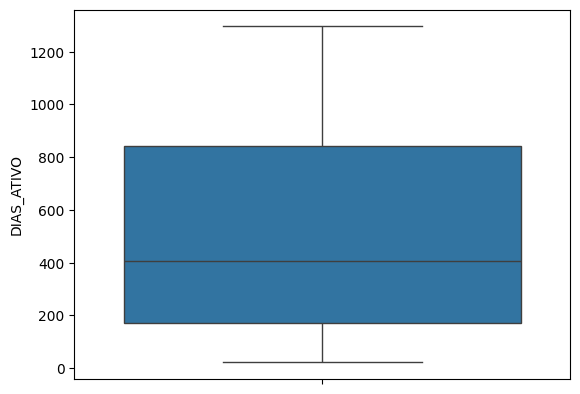

In [ ]:
#Exibição de um gráfico de BoxPlot

sns.boxplot(data = data, y = 'DIAS_ATIVO')
plt.show()

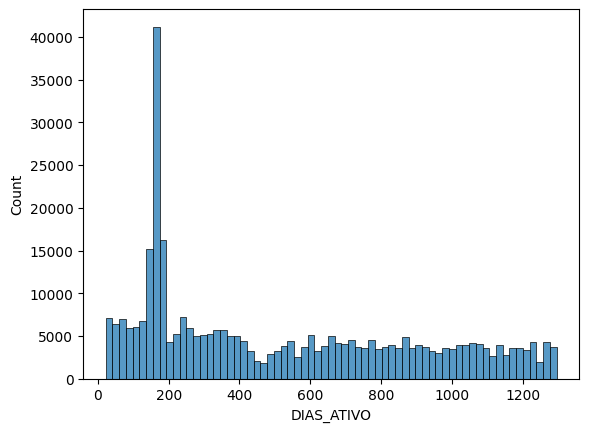

In [ ]:
#EXIBIÇÂO GRÁFICO HISTOGRAMA

sns.histplot(data = data, x = "DIAS_ATIVO")
plt.show()

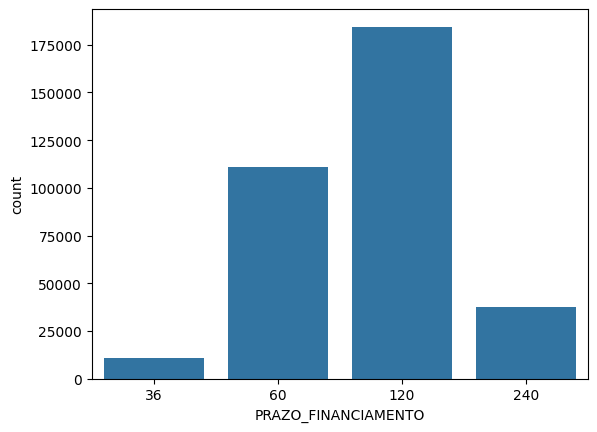

In [ ]:
#GRÁFICO SIMPLES PARA VERIFICARMOS A QUANTIDADE DE FINANCIAMENTOS POR PRAZO

sns.countplot(data = data , x = "PRAZO_FINANCIAMENTO")
plt.show()

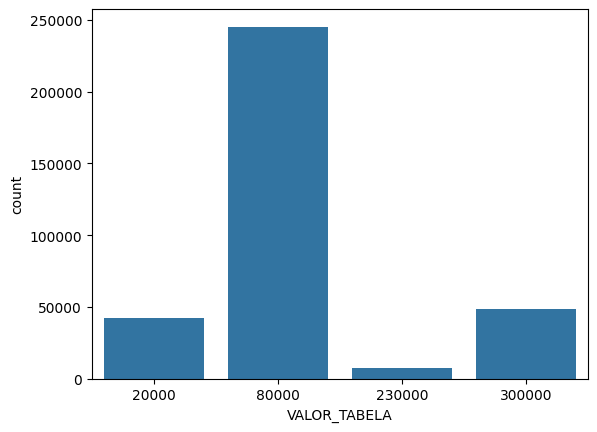

In [ ]:
sns.countplot(data = data, x = "VALOR_TABELA")
plt.show()

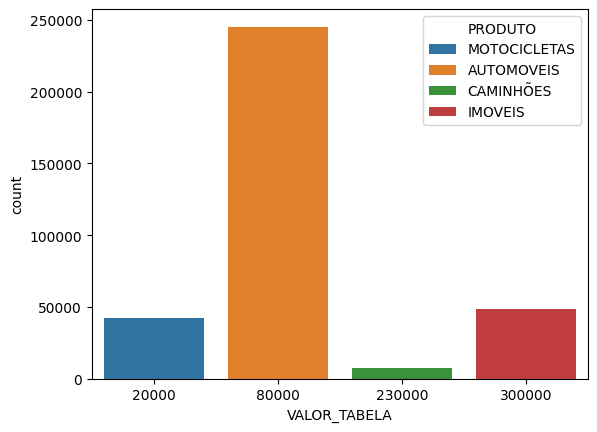

In [ ]:
sns.countplot(data = data , x = "VALOR_TABELA", hue = "PRODUTO")
plt.show()